In [732]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [733]:
file = 'mutual_funds_data.csv'

Data fields:
- Scheme Name: Name of the mutual fund scheme
- Min sip: Min sip amount required to start.
- Min lumpsum: Min lumpsum amount required to start.
- Expense ratio: calculated as a percentage of the Scheme's average Net Asset Value (NAV).
- Fund size: the total amount of money that a mutual fund manager must oversee and invest.
- Fund age: years since inception of scheme
- Fund manager: A fund manager is responsible for implementing a fund's investment strategy and managing its trading activities.
- Risk level:
    - 1- Low risk
    - 2- Low to moderate
    - 3- Moderate
    - 4- Moderately High
    - 5- High
    - 6- Very High
- AMC name: Mutual fund house managing the assets.
- Rating: 0-5 rating assigned to scheme
- Category: The category to which the mutual fund belongs (e.g. equity, debt, hybrid)
- Sub-category : It includes category like Small cap, Large cap, ELSS, etc.
- Return_1yr (%): The return percentage of the mutual fund scheme over 1 year.
- Return_3yr (%): The return percentage of the mutual fund scheme over 3 year.
- Return_5yr (%): The return percentage of the mutual fund scheme over 5year.

In [734]:
df = pd.read_csv(file, skipinitialspace = True, encoding = 'utf-8')
df.drop(['sortino', 'alpha', 'sd', 'beta', 'sharpe'], axis = 1, inplace = True)

In [735]:
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.9
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.5
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.7
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,NaN
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.7


In [736]:
df.shape

(814, 15)

In [737]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   scheme_name    814 non-null    object 
 1   min_sip        814 non-null    int64  
 2   min_lumpsum    814 non-null    int64  
 3   expense_ratio  814 non-null    float64
 4   fund_size_cr   814 non-null    float64
 5   fund_age_yr    814 non-null    int64  
 6   fund_manager   814 non-null    object 
 7   risk_level     814 non-null    int64  
 8   amc_name       814 non-null    object 
 9   rating         814 non-null    int64  
 10  category       814 non-null    object 
 11  sub_category   814 non-null    object 
 12  returns_1yr    814 non-null    float64
 13  returns_3yr    793 non-null    float64
 14  returns_5yr    647 non-null    float64
dtypes: float64(5), int64(5), object(5)
memory usage: 95.5+ KB


In [738]:
df.describe()

,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,risk_level,rating,returns_1yr,returns_3yr,returns_5yr
count,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,814.000000,793.000000,647.000000
mean,528.500000,3047.468059,0.713231,3812.854214,8.319410,4.400491,2.641278,3.921376,18.525347,9.490726
std,369.184517,2514.619513,0.482161,7181.479475,2.640622,1.814741,1.463476,6.675502,12.108476,3.714015
min,0.000000,0.000000,0.000000,2.380000,1.000000,1.000000,0.000000,-19.700000,3.300000,-4.100000
25%,150.000000,500.000000,0.310000,175.250000,6.000000,3.000000,2.000000,1.500000,6.200000,6.700000
50%,500.000000,5000.000000,0.615000,940.500000,10.000000,6.000000,3.000000,4.400000,18.500000,8.900000
75%,1000.000000,5000.000000,1.030000,3819.000000,10.000000,6.000000,4.000000,5.600000,27.100000,12.200000
max,2000.000000,25000.000000,2.590000,57052.000000,17.000000,6.000000,5.000000,130.800000,71.400000,23.200000


In [739]:
df['returns_3yr'].fillna(df.returns_3yr.mean(), inplace=True)
df['returns_5yr'].fillna(df.returns_5yr.mean(), inplace=True)
df['returns_3yr'] = df['returns_3yr'].round(2)
df['returns_5yr'] = df['returns_5yr'].round(2)

In [740]:
df['cumulative_return'] = df[['returns_1yr', 'returns_3yr', 'returns_5yr']].mean(axis=1)
df['cumulative_return'] = df['cumulative_return'].round(2)

### SCHEME_NAME

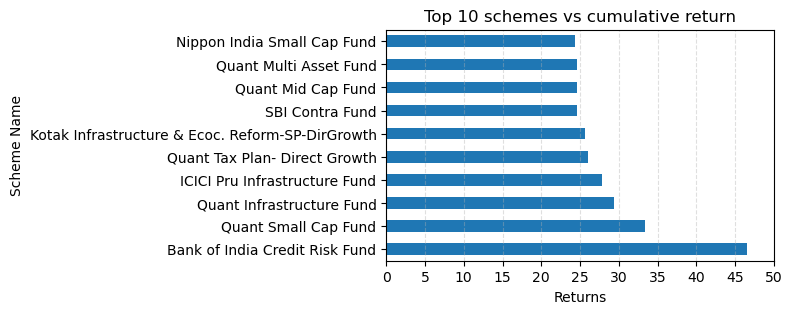

In [741]:
test = df.groupby(['scheme_name'])['cumulative_return'].mean().sort_values(ascending=False)[:10]
ax = test.plot(kind = 'barh', figsize=(5,3))
plt.title('Top 10 schemes vs cumulative return')
plt.xlabel('Returns')
plt.ylabel('Scheme Name')
plt.xticks(np.arange(0,51,5))
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.show()

### SIP AND LUMPSUM

#### Pocket friendliness
- based on min sip amount
- high - 0-500 and 0-5000
- medium - 501-1000 and 5001-15000
- low - >1000 and >15000

In [742]:
pocket_friendly = [0]*df.min_sip.shape[0]
for i in range(df.min_sip.shape[0]):
    if (df.min_sip[i]<=500):
        pocket_friendly[i] = 'HIGH'
    elif ((df.min_sip[i]>500 and df.min_sip[i]<=1000)):
        pocket_friendly[i] = 'MEDIUM'
    else:
        pocket_friendly[i] = 'LOW'
        
df['pocket_friendly'] = pocket_friendly

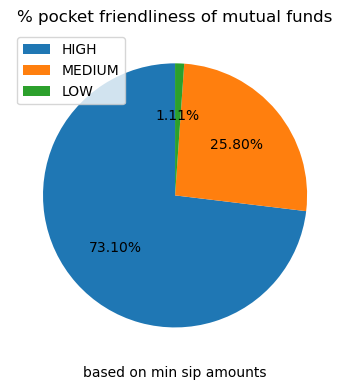

In [743]:
test = df['pocket_friendly'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(test.values, autopct='%.2f%%', explode = [0,0,0], startangle=90)
plt.legend(['HIGH', 'MEDIUM', 'LOW'], loc='upper left')
plt.title('% pocket friendliness of mutual funds')
plt.xlabel('based on min sip amounts')
plt.tight_layout()
plt.show()

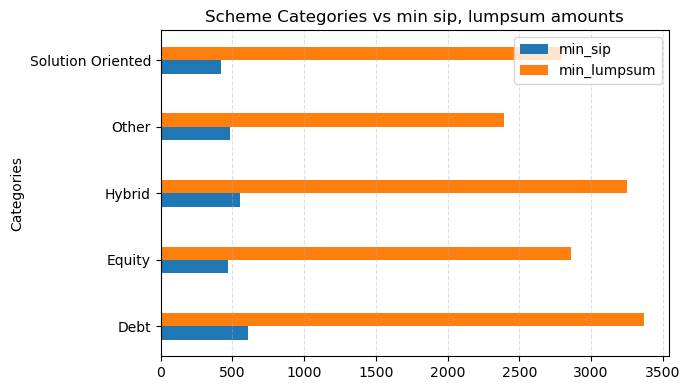

In [744]:
test = df.groupby('category')[['min_sip','min_lumpsum']].mean()
ax = test.plot(kind='barh', width=0.4, figsize=(7, 4))
plt.ylabel('Categories')
plt.title('Scheme Categories vs min sip, lumpsum amounts')
plt.legend(loc='upper right')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

### EXPENSE RATIO
The term "expense ratio" refers to the annual fee that a mutual fund charges its shareholders. It represents the percentage of a fund's assets that are used to cover the fund's operating expenses. These expenses may include management fees, administrative fees, marketing and distribution costs, and other operational expenses.

Expense ratios are an important consideration for investors because they directly impact the net return of the mutual fund. A higher expense ratio means that more of the fund's returns are used to cover expenses, leaving less for the investors. Conversely, a lower expense ratio means that a larger portion of the fund's returns is passed on to the investors.

For example, if a mutual fund has an expense ratio of 1%, and it generates a return of 8% in a given year, the net return that investors will receive is 7% (8% - 1%).

In [745]:
df['net_return'] = df.cumulative_return - df.expense_ratio
df.head()

,scheme_name,min_sip,min_lumpsum,expense_ratio,fund_size_cr,fund_age_yr,fund_manager,risk_level,amc_name,rating,category,sub_category,returns_1yr,returns_3yr,returns_5yr,cumulative_return,pocket_friendly,net_return
0,Aditya Birla SL Active Debt Multi-Mgr FoF-Dir ...,100,100,0.27,10.0,10,Kaustubh Gupta,3,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,4.0,6.5,6.90,5.80,HIGH,5.53
1,Aditya Birla SL Arbitrage Fund,1000,1000,0.36,4288.0,10,Lovelish Solanki,1,Aditya Birla Sun Life Mutual Fund,3,Hybrid,Arbitrage Mutual Funds,5.6,4.8,5.50,5.30,MEDIUM,4.94
2,Aditya Birla SL Asset Allocator FoF-Dir Growth,1000,1000,0.53,157.0,10,Vinod Narayan Bhat,5,Aditya Birla Sun Life Mutual Fund,3,Other,FoFs Domestic,2.0,18.9,9.70,10.20,MEDIUM,9.67
3,Aditya Birla SL Bal Bhavishya Yojna – Dir Growth,500,1000,0.76,637.0,4,Atul Penkar,6,Aditya Birla Sun Life Mutual Fund,2,Solution Oriented,Childrens Funds,-0.7,17.1,9.49,8.63,HIGH,7.87
4,Aditya Birla SL Balanced Advantage Fund,100,100,0.61,6386.0,10,Mohit Sharma,6,Aditya Birla Sun Life Mutual Fund,4,Hybrid,Dynamic Asset Allocation or Balanced Advantage,4.5,18.6,9.70,10.93,HIGH,10.32


In [746]:
temp = df[['scheme_name', 'cumulative_return', 'expense_ratio', 'net_return']].sort_values(ascending=False, by='net_return')[:5]
temp.reset_index(drop=True, inplace=True)
temp.head()

,scheme_name,cumulative_return,expense_ratio,net_return
0,Bank of India Credit Risk Fund,46.50,1.54,44.96
1,Quant Small Cap Fund,33.33,0.64,32.69
2,Quant Infrastructure Fund,29.40,0.64,28.76
3,ICICI Pru Infrastructure Fund,27.80,1.64,26.16
4,Quant Tax Plan- Direct Growth,26.00,0.57,25.43


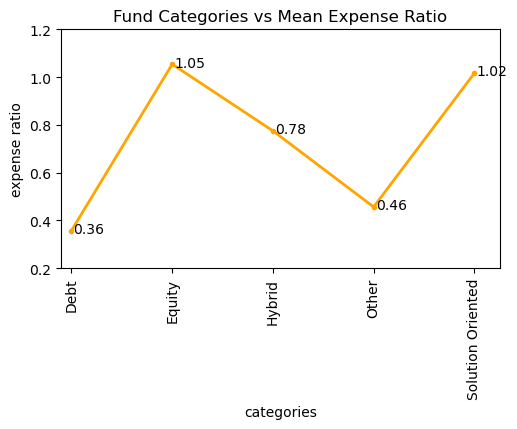

In [747]:
#mean expense ratio vs categories of funds
test = df.groupby('category')['expense_ratio'].mean()
plt.figure(figsize=(5,4))
plt.plot(test.index, test.values, marker='.', linewidth=2, color='orange')
plt.xticks(rotation=90)
plt.tight_layout()
for i in range(len(test.index)):
    plt.text(i+0.02, test.values[i]-0.01, format(test.values[i], '.2f'))
plt.axis([-0.1, 4.25, 0.2, 1.2])
plt.title('Fund Categories vs Mean Expense Ratio')
plt.ylabel('expense ratio')
plt.xlabel('categories')
plt.show()

### FUND SIZE

In [748]:
#classification of mutual funds based on their assests under management (fund size)
fund_type = [0]*df.fund_size_cr.shape[0]
for i in range(df.fund_size_cr.shape[0]):
    if (df.fund_size_cr[i]<=5000):
        fund_type[i] = 'SMALL'
    elif ((df.fund_size_cr[i]>5000 and df.fund_size_cr[i]<=20000)):
        fund_type[i] = 'MID'
    else:
        fund_type[i] = 'LARGE'
        
df['fund_type'] = fund_type

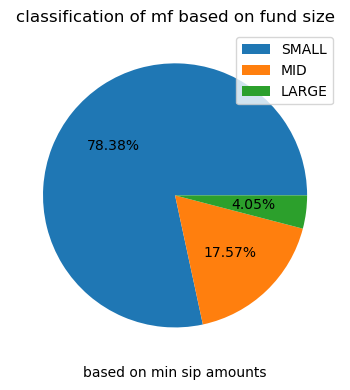

In [749]:
test = df['fund_type'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(test.values, autopct='%.2f%%', explode = [0,0,0])
plt.legend(['SMALL', 'MID', 'LARGE'], loc='upper right')
plt.title('classification of mf based on fund size')
plt.xlabel('based on min sip amounts')
plt.tight_layout()
plt.show()

In [750]:
df.groupby('fund_type')['risk_level'].mean()

fund_type
LARGE    4.575758
MID      4.335664
SMALL    4.405956
Name: risk_level, dtype: float64

In [751]:
df.groupby('fund_type')['net_return'].mean()

fund_type
LARGE    10.604848
MID       9.962517
SMALL     9.891003
Name: net_return, dtype: float64

In [752]:
df.groupby('fund_type')['rating'].mean()

fund_type
LARGE    3.363636
MID      3.244755
SMALL    2.468652
Name: rating, dtype: float64

### FUND MANAGERS

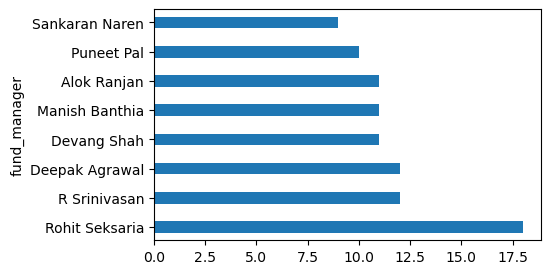

In [753]:
#fund managers vs schemes handles by them
test = df.groupby('fund_manager')['scheme_name'].count().sort_values(ascending=False)[:8]
ax = test.plot(kind='barh', width=0.4, figsize=(5,3))
plt.show()

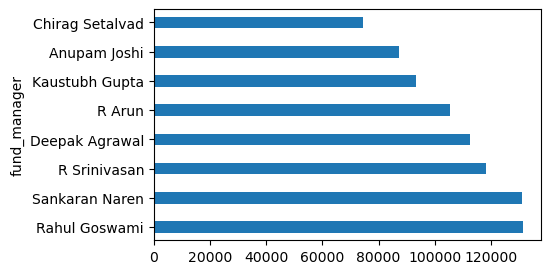

In [754]:
#fund managers vs funds (in cr) handled by them
test = df.groupby('fund_manager')['fund_size_cr'].sum().sort_values(ascending=False)[:8]
ax = test.plot(kind='barh', width=0.4, figsize=(5,3))
plt.show()

In [755]:
#fund_managers by returns_1yr - if you are looking for short term profits
df.groupby(['fund_manager'])[['returns_1yr']].mean().sort_values(ascending=False, by = 'returns_1yr')[:5]

,returns_1yr
fund_manager,
Alok Singh,28.583333
Priyanka Khandelwal,21.100000
Sanjay Doshi,20.400000
Ihab Dalwai,16.900000
Sunaina da Cunha,15.400000


In [756]:
#fund_managers by returns_3yr - if you are looking for short to long term profits - 3 yrs
df.groupby(['fund_manager'])[['returns_3yr']].mean().sort_values(ascending=False, by = 'returns_3yr')[:5]

,returns_3yr
fund_manager,
Vasav Sahgal,51.675000
Samir Rachh,47.600000
Vaibhav Dusad,45.300000
Sahil Shah,42.500000
Sanjeev Sharma,38.828571


In [757]:
#fund_managers by returns_5yr - if you are looking for long term profits - 5 yrs
df.groupby(['fund_manager'])[['returns_5yr']].mean().sort_values(ascending=False, by = 'returns_5yr')[:5]

,returns_5yr
fund_manager,
Vaibhav Dusad,21.60
Vasav Sahgal,20.50
Mayur Patel,18.10
Aniruddha Naha,17.35
Samir Rachh,16.80


### AMC NAME

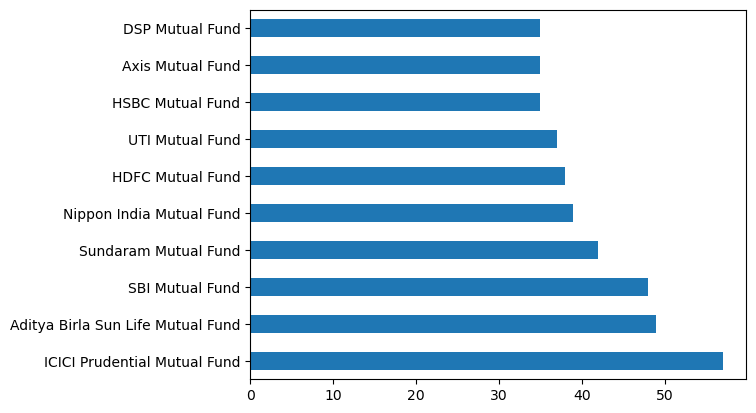

In [758]:
#amc_name
df['amc_name'].value_counts().nlargest(10).plot(kind='barh')
plt.show()

                        case study analysis by Yagay Khatri